In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from querys import get_usd, get_usd_of, get_milestones

In [2]:
milestones = get_milestones()
usd = get_usd()
usd_off = get_usd_of()

In [3]:
usd_full = pd.merge(usd, usd_off,how='right',on='fecha')
df = pd.merge(usd_full, milestones, how = 'left', on='fecha')

In [4]:
factor = len(df)//4
df1 = df.iloc[:factor]
df2 = df.iloc[factor:factor*2]
df3 = df.iloc[factor*2:factor*3]
df4 = df.iloc[factor*3:]

In [5]:

def event_dict(df):    
    event_keys = []
    event_values = []
    for i in df.dropna(subset='eventos')['fecha']:
        event_keys.append(i.date()),
        event_values.append(df.eventos.values[df.fecha == i])
    events = dict(zip(event_keys, event_values))
    return events

In [35]:
def plot_events(df):
    events = event_dict(df)

    fig, axes = plt.subplots(figsize=(25,7))

    #sns.set(rc={'figure.figsize':(30,10)})
    sns.lineplot(x='fecha',y='dolar_blue',data=df, label='Dolar Blue')
    sns.lineplot(x='fecha',y='dolar_oficial',data=df, label= 'Dolar Oficial')

    for i in events:
        plt.axvline(i, color='black', linestyle='--', linewidth=2, label = f'{i}: {events[i]}')

    months = mdates.MonthLocator() 
    years_fmt = mdates.DateFormatter('%Y-%m') 
    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(years_fmt)
    axes.xaxis.set_minor_locator(months)  
   
    axes.set_ylabel('Precio', fontsize=15)
    axes.set_xlabel('Fecha')

    plt.title(f"Dólar y eventos para el período {df['fecha'].min().date()}/{df['fecha'].max().date()}", fontsize=15)
    plt.xticks(rotation = 'vertical')
    plt.legend()
    #plt.tight_layout()
    plt.show()

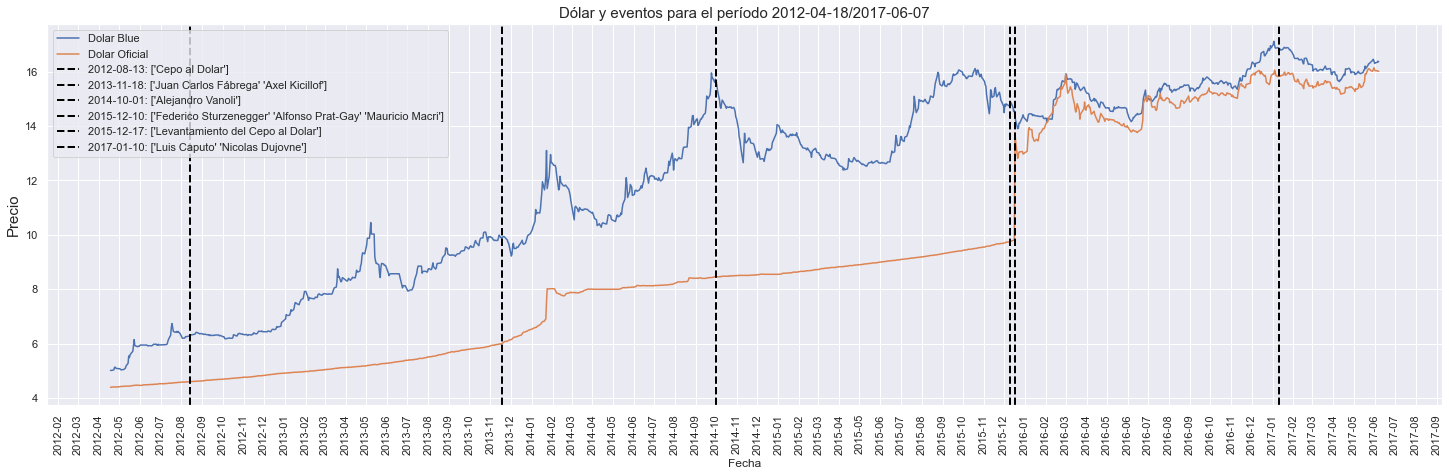

In [36]:
plot_events(df3)

datetime.date(2012, 4, 18)